In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Diamond Dataset
# https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle

df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, 'hrokrin/the-largest-diamond-dataset-currely-on-kaggle', 'diamonds.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
print(df.shape)
df.head()

100%|██████████| 4.16M/4.16M [00:00<00:00, 48.9MB/s]

Extracting zip of diamonds.csv...


(219703, 25)


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [ ]:
# Check for amount of null and/or incomplete data
df.isna().sum()

,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0
culet_size,0


In [ ]:
df[df["fluor_intensity"].isna()].sample(5)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
28473,Round,E,VVS1,0.22,Excellent,GIA,Excellent,Excellent,unknown,unknown,...,2.41,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,798
192826,Round,K,VS1,1.63,Excellent,GIA,Excellent,Excellent,Yes,unknown,...,4.59,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,12120
202047,Round,F,SI1,1.50,Excellent,GIA,Excellent,Excellent,Yes,N,...,4.52,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,15452
216007,Round,I,VS2,3.05,Excellent,GIA,Excellent,Excellent,unknown,N,...,5.61,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,49191
141429,Emerald,H,VS1,0.84,unknown,GIA,Excellent,Excellent,Yes,N,...,3.16,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,3408


In [ ]:
df.sample(5)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
204589,Round,K,VS1,2.02,Excellent,GIA,Excellent,Excellent,unknown,N,...,4.87,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,18530
52148,Round,F,VVS2,0.24,Excellent,GIA,Excellent,Excellent,unknown,unknown,...,2.43,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,946
163204,Round,E,VS1,0.71,Excellent,GIA,Excellent,Excellent,Yes,N,...,3.54,M,STK,unknown,Faint,unknown,unknown,unknown,unknown,4988
179074,Radiant,F,VS1,1.00,unknown,GIA,Very Good,Very Good,unknown,N,...,3.88,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,7278
46855,Round,E,VS2,0.30,Very Good,GIA,Very Good,Very Good,unknown,N,...,2.69,M,TK,unknown,NaN,unknown,unknown,unknown,unknown,904


In [ ]:
for col in df.columns:
    unknown_count = (df[col] == "unknown").sum()
    nan_count = df[col].isna().sum()
    total_count = unknown_count + nan_count
    percent = total_count / df.shape[0] * 100
    print(f"{col} = {total_count} = {percent:.2f}%")


cut = 0 = 0.00%
color = 9162 = 4.17%
clarity = 0 = 0.00%
carat_weight = 0 = 0.00%
cut_quality = 60607 = 27.59%
lab = 0 = 0.00%
symmetry = 0 = 0.00%
polish = 0 = 0.00%
eye_clean = 156916 = 71.42%
culet_size = 85740 = 39.03%
culet_condition = 204384 = 93.03%
depth_percent = 0 = 0.00%
table_percent = 0 = 0.00%
meas_length = 0 = 0.00%
meas_width = 0 = 0.00%
meas_depth = 0 = 0.00%
girdle_min = 83432 = 37.97%
girdle_max = 84295 = 38.37%
fluor_color = 203977 = 92.84%
fluor_intensity = 143619 = 65.37%
fancy_color_dominant_color = 210539 = 95.83%
fancy_color_secondary_color = 218641 = 99.52%
fancy_color_overtone = 219315 = 99.82%
fancy_color_intensity = 210541 = 95.83%
total_sales_price = 0 = 0.00%


In [ ]:
# different diamond grading labs
df["lab"].unique()

array(['IGI', 'GIA', 'HRD'], dtype=object)

In [ ]:
df["color"].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', 'unknown'],
      dtype=object)

In [ ]:
# 4 Cs (cut, color, clarity, and carat)

<Axes: >

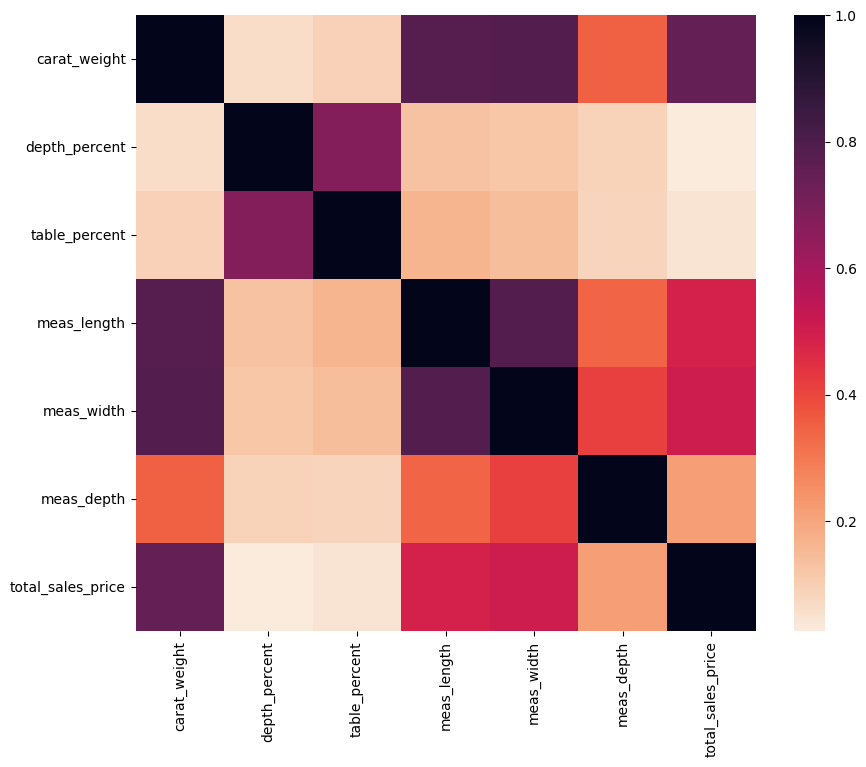

In [ ]:
# Features Correlation

fig, ax = plt.subplots(figsize=(10,8))
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

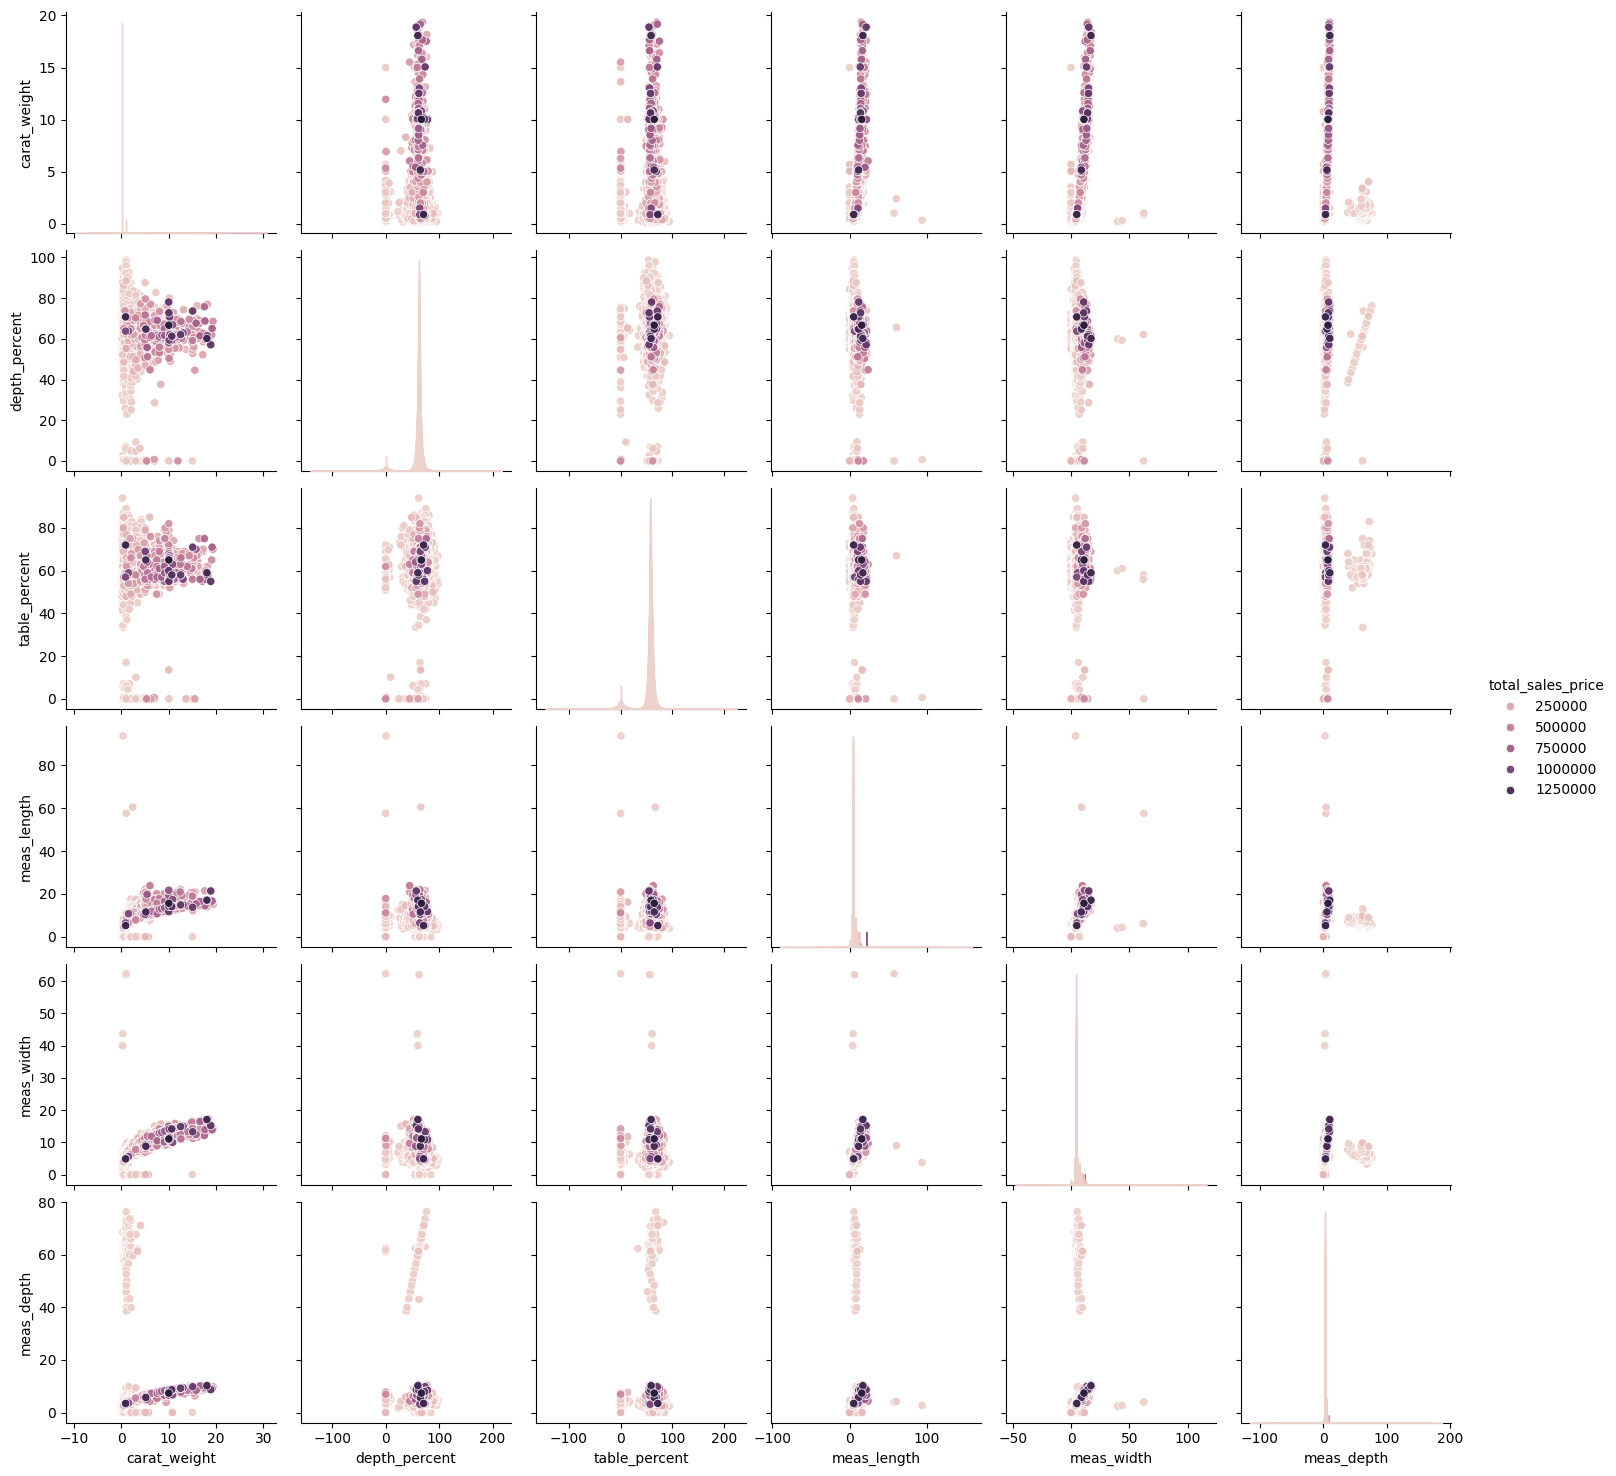

In [ ]:
sns.pairplot(df, hue='total_sales_price', diag_kind='kde')

In [ ]:
print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

max_value = df["carat_weight"].max()
min_value = df["carat_weight"].min()
average_value = df["carat_weight"].mean()
std_deviation = df["carat_weight"].std()
print(f"Max: {max_value}, Min: {min_value}, Average: {average_value}, Std Dev: {std_deviation}")

['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher']
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown']
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3']
Max: 19.35, Min: 0.08, Average: 0.7551762151631977, Std Dev: 0.8458942836922527


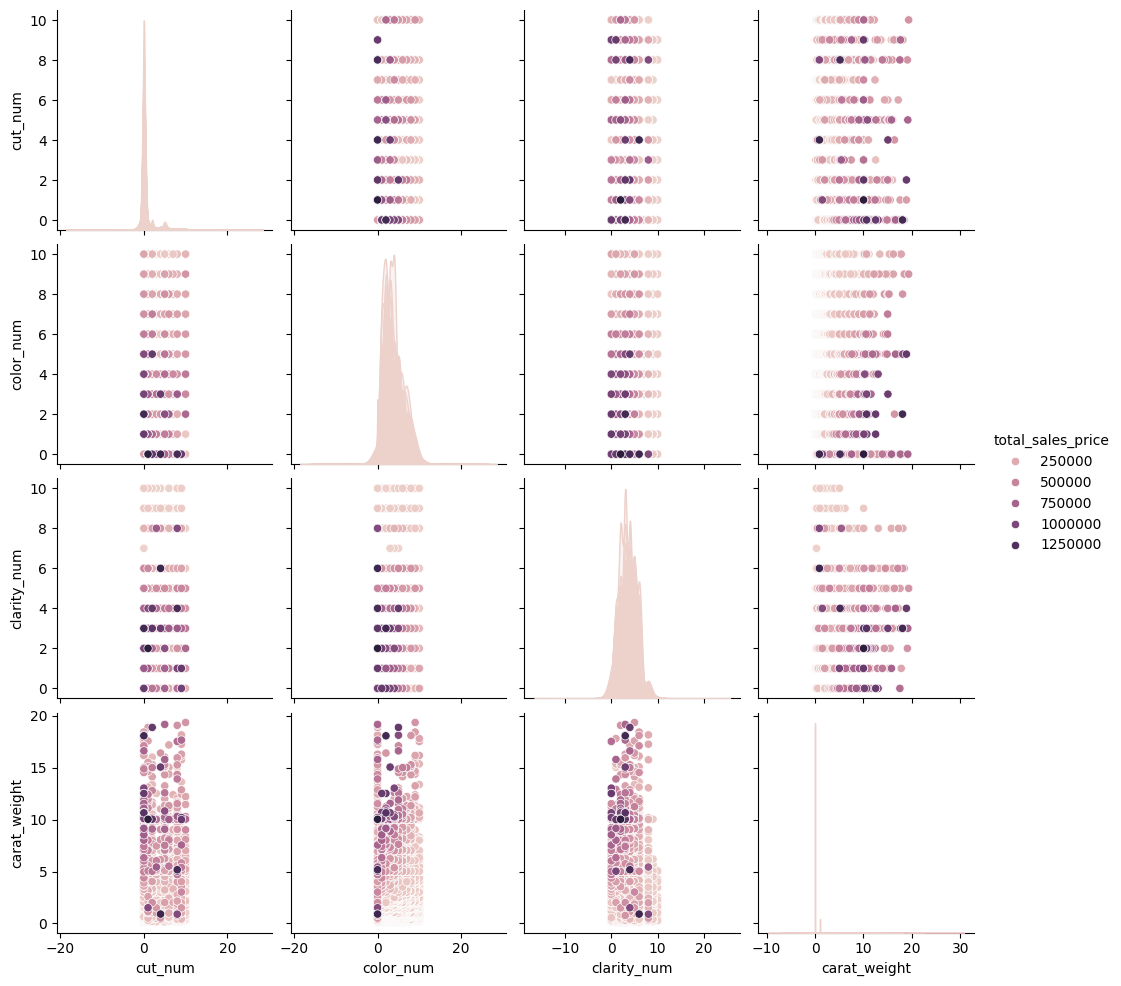

In [ ]:
# We're going to try analysis on just the four C's that are supposedly what you need to look for when buying diamonds.
# Cut, Color, Clarity, Carat
# Sources:
# https://www.gia.edu/gia-about/4cs-color
# https://4cs.gia.edu/en-us/diamond-clarity/

numerical_df = df.copy()
cut_map = {"Round": 0, "Pear": 1, "Oval": 2, "Marquise": 3, "Princess": 4, "Emerald": 5, "Heart": 6, "Cushion": 7, "Radiant": 8, "Cushion Modified": 9, "Asscher": 10}
numerical_df["cut_num"] = numerical_df["cut"].map(cut_map)
color_map = {"unknown": 0, "D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7, "K": 8, "L": 9, "M": 10}
numerical_df["color_num"] = numerical_df["color"].map(color_map)
clarity_map = {"IF": 0, "VVS1": 1, "VVS2": 2, "VS1": 3, "VS2": 4, "SI1": 5, "SI2": 6, "SI3": 7, "I1": 8, "I2": 9, "I3": 10}
numerical_df["clarity_num"] = numerical_df["clarity"].map(clarity_map)

cccc_cols = ["cut_num", "color_num", "clarity_num", "carat_weight", "total_sales_price"]
sns.pairplot(numerical_df[cccc_cols], hue='total_sales_price', diag_kind='kde')

In [ ]:
print(df.head)

<bound method NDFrame.head of              cut    color clarity  carat_weight cut_quality  lab   symmetry  \
0          Round        E    VVS2          0.09   Excellent  IGI  Very Good   
1          Round        E    VVS2          0.09   Very Good  IGI  Very Good   
2          Round        E    VVS2          0.09   Excellent  IGI  Very Good   
3          Round        E    VVS2          0.09   Excellent  IGI  Very Good   
4          Round        E    VVS2          0.09   Very Good  IGI  Very Good   
...          ...      ...     ...           ...         ...  ...        ...   
219698     Round        E     VS1         10.65   Excellent  GIA  Excellent   
219699   Radiant  unknown     VS2          5.17     unknown  GIA  Very Good   
219700     Round        E     VS1         18.07   Excellent  GIA  Excellent   
219701  Princess  unknown     SI2          0.90     unknown  GIA       Good   
219702      Pear  unknown    VVS2         10.03     unknown  GIA  Very Good   

           polish eye

## Part 1

Here I implement a neural network from scratch. The datset I'm using is about diamonds, with different metrics each diamond is tested for (cut, carat, color, clarity, etc.) and the total sales price. We are trying to use the diamond's features to predict the total sales price using regression. I selected this dataset because it is very large and so will have enough data to train the neural network, but also enough input features. Many of the columns had to be mapped to values because apparently diamond grading is done via a hundred different scales and labels. I checked how many of a column actually had data, and if over 90% of the dataset had that feature missing, I removed and didn't use those columns. In all other cases, the unknown/NaN values were replaced with that column's mean.

I did test other versions of gradient descent, but since the normal version worked quite quickly and relatively accurately I did not replace it.

Source:
https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle

In [4]:
# Data pre-processing

# Additional sources that were needed:
# https://beyond4cs.com/grading/girdle-thickness/
# https://www.gemayeljewellery.com/education-center/diamonds-education/eye-clean/
# https://www.diamonds.pro/education/diamond-culet/#h-diamond-culet-grades
# https://4cs.gia.edu/en-us/blog/diamond-fluorescence-good-bad/

trimmed_df = df[df["color"] != "unknown"] #There are few enough data points missing these features that I just removed them
trimmed_df = trimmed_df[trimmed_df["girdle_min"] != "unknown"]
trimmed_df = trimmed_df[trimmed_df["girdle_max"] != "unknown"]
sampled_df = trimmed_df.sample(n=12500, random_state=42)
sampled_df.head()

# There are few enough data points missing these features that we just removed them
sampled_df = sampled_df[sampled_df["color"] != "unknown"]

cut_map = {"Round": 0, "Pear": 1, "Oval": 2, "Marquise": 3, "Princess": 4, "Emerald": 5, "Heart": 6, "Cushion": 7, "Radiant": 8, "Cushion Modified": 9, "Asscher": 10}
color_map = {"unknown": 0, "D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7, "K": 8, "L": 9, "M": 10}
clarity_map = {"IF": 0, "VVS1": 1, "VVS2": 2, "VS1": 3, "VS2": 4, "SI1": 5, "SI2": 6, "SI3": 7, "I1": 8, "I2": 9, "I3": 10}
lab_map = {"GIA": 0, "IGI": 5, "HRD": 10}
symmetry_polish_map = {"Excellent": 10, "Very Good": 0}
girdle_map = {"XTN": 1, "VTN": 2, "TN": 3, "STN": 4, "M": 5, "STK": 6, "TK": 7, "VTK": 8, "XTK": 9 }
eye_clean_map = {"unknown": 9, "No": 0, "Borderline": 3, "E1": 7, "Yes": 10} # unknown was set to mean
cut_quality_map = {"unknown": 5, "Good": 0, "Very Good": 5, "excellent": 10} # unknown was set to mean
culet_size_map = {"unknown": 1, "N": 0, "VS": 2, "S": 4, "M": 6, "SL": 8, "L": 10} # unknown was set to mean
flour_map = {'Faint': 2, 'Very Slight': 4, 'Medium': 6, 'Strong': 8, 'Very Strong': 10}

sampled_df["cut_num"] = sampled_df["cut"].map(cut_map)
sampled_df["color_num"] = sampled_df["color"].map(color_map)
sampled_df["clarity_num"] = sampled_df["clarity"].map(clarity_map)
sampled_df["cut_quality_num"] = sampled_df["cut_quality"].map(cut_quality_map)
sampled_df["cut_quality_num"] = sampled_df["cut_quality_num"].fillna(5)
sampled_df["lab_num"] = sampled_df["lab"].map(lab_map)
sampled_df["symmetry_num"] = sampled_df["symmetry"].map(symmetry_polish_map)
sampled_df["polish_num"] = sampled_df["polish"].map(symmetry_polish_map)
sampled_df["girdle_min_num"] = sampled_df["girdle_min"].map(girdle_map)
sampled_df["girdle_max_num"] = sampled_df["girdle_max"].map(girdle_map)
sampled_df["eye_clean_num"] = sampled_df["eye_clean"].map(eye_clean_map)
sampled_df["culet_size_num"] = sampled_df["culet_size"].map(culet_size_map)
sampled_df["fluor_intensity_num"] = sampled_df["fluor_intensity"].map(flour_map)
sampled_df["fluor_intensity_num"] = sampled_df["fluor_intensity_num"].fillna(0)

sampled_df.drop(columns=["cut", "color", "clarity", "cut_quality", "lab", "symmetry", "polish", "girdle_min", "girdle_max", "eye_clean", "culet_size", "fluor_intensity"], inplace=True)

# these had very high unknown/na values (90+%), so we wont use fancy color columns
sampled_df.drop(columns=["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color"], inplace=True)

# scale features to 0-10 scale
scaler = MinMaxScaler(feature_range=(0, 10))
sampled_df['carat_weight'] = scaler.fit_transform(sampled_df[['carat_weight']])
sampled_df['depth_percent'] = scaler.fit_transform(sampled_df[['depth_percent']])
sampled_df['table_percent'] = scaler.fit_transform(sampled_df[['table_percent']])
sampled_df['meas_length'] = scaler.fit_transform(sampled_df[['meas_length']])
sampled_df['meas_width'] = scaler.fit_transform(sampled_df[['meas_width']])
sampled_df['meas_depth'] = scaler.fit_transform(sampled_df[['meas_depth']])
# sales price is a big range
scaler2 = MinMaxScaler(feature_range=(0, 10))
sampled_df['total_sales_price'] = scaler2.fit_transform(sampled_df[['total_sales_price']])

print(sampled_df.shape)
sampled_df.head()

(12500, 19)


,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price,cut_num,color_num,clarity_num,cut_quality_num,lab_num,symmetry_num,polish_num,girdle_min_num,girdle_max_num,eye_clean_num,culet_size_num,fluor_intensity_num
79066,0.244094,7.010676,6.896552,0.794045,0.780645,0.417889,0.009194,0,5,5,5.0,0,0,10,3,6,9,0,2.0
98426,0.275591,7.354686,6.781609,0.799007,0.785484,0.441349,0.012875,0,2,5,5.0,0,10,0,5,7,9,0,0.0
73416,0.244094,7.200474,6.896552,0.779156,0.764516,0.420821,0.008570,0,4,6,5.0,0,0,10,3,6,9,0,0.0
1769,0.188976,7.402135,6.666667,0.729529,0.714516,0.404692,0.003019,0,8,8,5.0,0,10,0,5,5,9,0,2.0
23859,0.212598,8.659549,8.448276,0.651778,0.627419,0.416422,0.005473,4,8,0,5.0,5,0,10,5,5,9,0,4.0


In [ ]:
class NeuralNetwork:
  a = 0.01
  epochs = 100

  def __init__(self, a=0.01, epochs=100):
    self.a = a
    self.epochs = epochs

  def run_training(self, x_train, y_train):
    w1 = np.random.randn(x_train.shape[1], 5)
    w2 = np.random.randn(5, 1)
    w1, w2 = self.train(x_train, y_train, w1, w2, self.a, self.epochs)
    return w1, w2

  # For the activation function, we'll be using Hyperbolic tangent
  def activation(self, z):
    return np.tanh(z)

  # Forward propogation
  def forward_propogation(self, x, w1, w2):
    z1 = np.dot(x, w1)
    a1 = self.activation(z1)
    z2 = np.dot(a1, w2)
    a2 = self.activation(z2)
    return a2

  # Backwards propogation
  def backward_progpagation(self, x, y, w1, w2, a):
    z1 = np.dot(x, w1)
    a1 = self.activation(z1)
    z2 = np.dot(a1, w2)
    a2 = self.activation(z2)

    d2 = a2 - y
    d1 = np.dot(d2, w2.T) * a1 * (1 - a1)
    dw1 = np.dot(x.T, d1)
    dw2 = np.dot(a1.T, d2)

    w1 = w1 - a*dw1
    w2 = w2 - a*dw2
    return w1, w2

  def train(self, x, y, w1, w2, a, epochs):
    for i in range(epochs):
      a2 = self.forward_propogation(x, w1, w2)
      w1, w2 = self.backward_progpagation(x, y, w1, w2, a)
      loss = self.cost(a2, y)
      print("Epoch: ", i, " Loss:", loss)
    return w1, w2

  # Calculate gradient of loss w/ weights
  # currently using mean squared eror
  def cost(self, y_pred, y):
    return np.mean((y_pred - y)**2)

  # Make prediction
  def predict(self, x, w1, w2):
    a2 = self.forward_propogation(x, w1, w2)
    return a2

def initialize(x_train, y_train):
  neural_net = NeuralNetwork()
  w1, w2 = neural_net.run_training(x_train, y_train)
  return w1, w2, neural_net

In [ ]:
# count each column's unknown or NaN values
for col in sampled_df.columns:
    unknown_count = (sampled_df[col] == "unknown").sum()
    nan_count = sampled_df[col].isna().sum()
    total_count = unknown_count + nan_count
    percent = total_count / sampled_df.shape[0] * 100
    print(f"{col} = {total_count} = {percent:.2f}%")


carat_weight = 0 = 0.00%
depth_percent = 0 = 0.00%
table_percent = 0 = 0.00%
meas_length = 0 = 0.00%
meas_width = 0 = 0.00%
meas_depth = 0 = 0.00%
total_sales_price = 0 = 0.00%
cut_num = 0 = 0.00%
color_num = 0 = 0.00%
clarity_num = 0 = 0.00%
cut_quality_num = 0 = 0.00%
lab_num = 0 = 0.00%
symmetry_num = 0 = 0.00%
polish_num = 0 = 0.00%
girdle_min_num = 0 = 0.00%
girdle_max_num = 0 = 0.00%
eye_clean_num = 0 = 0.00%
culet_size_num = 0 = 0.00%
fluor_intensity_num = 0 = 0.00%


In [15]:
# independent variables
x = sampled_df.drop(columns=["total_sales_price"])
# dependent/target variable
y = sampled_df.total_sales_price

print(y.shape)

# divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(x.head())
print(y.head())

(12500,)
       carat_weight  depth_percent  table_percent  meas_length  meas_width  \
79066      0.244094       7.010676       6.896552     0.794045    0.780645   
98426      0.275591       7.354686       6.781609     0.799007    0.785484   
73416      0.244094       7.200474       6.896552     0.779156    0.764516   
1769       0.188976       7.402135       6.666667     0.729529    0.714516   
23859      0.212598       8.659549       8.448276     0.651778    0.627419   

       meas_depth  cut_num  color_num  clarity_num  cut_quality_num  lab_num  \
79066    0.417889        0          5            5              5.0        0   
98426    0.441349        0          2            5              5.0        0   
73416    0.420821        0          4            6              5.0        0   
1769     0.404692        0          8            8              5.0        0   
23859    0.416422        4          8            0              5.0        5   

       symmetry_num  polish_num  girdle_m

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 18)
(2500, 18)
(10000, 1)
(2500, 1)


In [41]:
w1_result, w2_result, neural_network = initialize(x_train, y_train)

Epoch:  0  Loss: 1.202163777904387
Epoch:  1  Loss: 0.952106049684565
Epoch:  2  Loss: 0.952106049684565
Epoch:  3  Loss: 1.222151875060413
Epoch:  4  Loss: 0.952106049684565
Epoch:  5  Loss: 0.952106049684565
Epoch:  6  Loss: 1.222151875060413
Epoch:  7  Loss: 0.952106049684565
Epoch:  8  Loss: 1.222151875060413
Epoch:  9  Loss: 0.952106049684565
Epoch:  10  Loss: 1.222151875060413
Epoch:  11  Loss: 0.952106049684565
Epoch:  12  Loss: 1.222151875060413
Epoch:  13  Loss: 0.952106049684565
Epoch:  14  Loss: 1.222151875060413
Epoch:  15  Loss: 0.952106049684565
Epoch:  16  Loss: 1.222151875060413
Epoch:  17  Loss: 0.952106049684565
Epoch:  18  Loss: 0.9521060496844711
Epoch:  19  Loss: 1.222151875060413
Epoch:  20  Loss: 0.952106049684565
Epoch:  21  Loss: 1.222151875060413
Epoch:  22  Loss: 0.952106049684565
Epoch:  23  Loss: 1.222151875060413
Epoch:  24  Loss: 0.952106049684565
Epoch:  25  Loss: 1.222151875060413
Epoch:  26  Loss: 0.952106049684565
Epoch:  27  Loss: 1.222151875060413
E

In [47]:
y_result2 = neural_network.predict(x_test, w1_result, w2_result)

print(neural_network.cost(y_result2, y_test))

0.9298118508080557


## Part 2

Here, I'm using TensorFlow to build the 2-layer Neural Network for this same Diamond regression task. We already performed Exloratory Data Analysis above, normalized all of the features, and split it into train and test datasets. I used Adam for the optimizer so that the gradient descent uses momentum to converge faster. Using Mean Squared Error again for the loss function. I am not using Regularization because with this dataset I think there may be a lot of disparity with how much each feature is actually relevant or contributing to the calculation, so I don't think large weights should be penalized if they are helping decrease the loss function.

I tested number of epochs as a hyperparameter (100, 200, 300, 400), and found significant decreases in the overall loss with the increased model training time. For example, running 300 with 0.001 learning rate produced 2.08 final test loss. But 400 with 0.001 learning rate gave 0.38 test loss. I also tested different values for learning rate and found that the best result was increasing it from 0.001 to 0.01, as the test loss with 400 epochs and 0.01 learnning rate was 0.072.

In [35]:
import tensorflow as tf
import numpy as np

# Define the model correctly
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(x_train.shape[1],)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
loss_data = []

for epoch in range(400):
  with tf.GradientTape() as tape:
    predictions = model(x_train, training=True) # Here we are using TensorFlow Keras to perform forward propagation, but aren't using an activation function because this is a linear transformation
    loss = tf.reduce_mean(tf.square(predictions - y_train))

  # Here we do backward propogation with Tensorflow that uses the Adam optimizer for gradient descent with momentum
  gradients = tape.gradient(loss, model.trainable_variables)
  model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  loss_data.append(loss.numpy())
  if epoch % 10 == 0:
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# Evaluate on test data (optional)
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)


Epoch 0, Loss: 38.23030471801758
Epoch 10, Loss: 2.3727424144744873
Epoch 20, Loss: 4.476027965545654
Epoch 30, Loss: 1.7859511375427246
Epoch 40, Loss: 1.5791300535202026
Epoch 50, Loss: 1.1958928108215332
Epoch 60, Loss: 0.9068958759307861
Epoch 70, Loss: 0.7673354148864746
Epoch 80, Loss: 0.6428585648536682
Epoch 90, Loss: 0.5504460334777832
Epoch 100, Loss: 0.482805460691452
Epoch 110, Loss: 0.42921581864356995
Epoch 120, Loss: 0.3854159712791443
Epoch 130, Loss: 0.3489680290222168
Epoch 140, Loss: 0.3180716037750244
Epoch 150, Loss: 0.29152557253837585
Epoch 160, Loss: 0.2685328722000122
Epoch 170, Loss: 0.24851420521736145
Epoch 180, Loss: 0.2310093492269516
Epoch 190, Loss: 0.21563227474689484
Epoch 200, Loss: 0.20205260813236237
Epoch 210, Loss: 0.18998727202415466
Epoch 220, Loss: 0.17919516563415527
Epoch 230, Loss: 0.16947337985038757
Epoch 240, Loss: 0.16065317392349243
Epoch 250, Loss: 0.15259557962417603
Epoch 260, Loss: 0.14518727362155914
Epoch 270, Loss: 0.138336345553

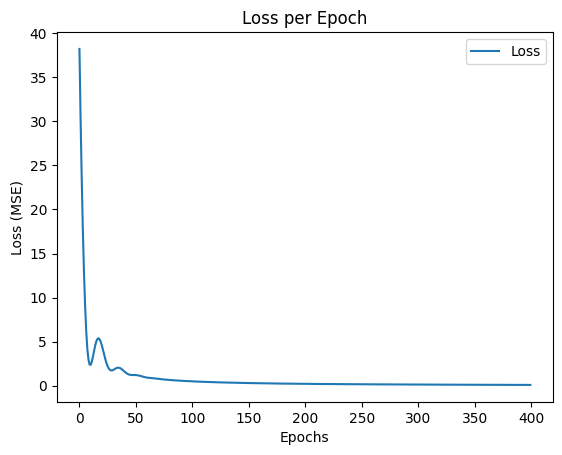

In [36]:
plt.plot(range(400), loss_data, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss per Epoch")
plt.legend()
plt.show()

### Task 4
Here I have a XGBoost Regression model so we can compare its results to that of the Neural Network. Like the Neural Network, I am using Mean Squared Error for the loss function. I tested a variety of learning rates, and found that 0.05 gave the best results compared to 0.1 and 0.01. Higher max_depth values did not improve the success of the model, and limiting it to 3 was better than 4, 5, or 6. It is quite impressive that the Boosting model (0.00612 MSE) was able to achieve lower loss than the Neural Network (0.0724 MSE) was able to.

In [54]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

boost_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.05, max_depth=3)
boost_model.fit(x_train, y_train)
y_boost_pred = boost_model.predict(x_test)

tree_mse = mean_squared_error(y_test, y_boost_pred)
print("Mean Squared Error:", tree_mse)

Mean Squared Error: 0.006119201798026677
